# Data Analysis: Seattle 911 Calls

In [89]:
import pandas as pd
import numpy as np

## Import and describe dataset

In [151]:
calls_file = 'Seattle_Police_Department_911_Incident_Response.csv'

In [152]:
calls = pd.read_csv(calls_file, low_memory=False, infer_datetime_format=True)

In [153]:
# Make a copy for easy replacement if we want to undo a transformation
calls_copy = calls.copy

In [154]:
calls.head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,7/17/10 20:49,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaN
1,15737,10000246471,2010246471,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,7/17/10 20:50,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaN
2,15738,10000246255,2010246255,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",7/17/10 20:55,21XX BLOCK OF 3RD AVE,M,M2,7200.2025,-122.342843,47.613551,"(47.613551471, -122.342843234)",NaN,NaN,NaN,NaN
3,15739,10000246473,2010246473,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,7/17/10 21:00,7XX BLOCK OF ROY ST,D,D1,7200.1002,-122.341847,47.625401,"(47.625401388, -122.341846999)",NaN,NaN,NaN,NaN
4,15740,10000246330,2010246330,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",7/17/10 21:00,9XX BLOCK OF ALOHA ST,D,D1,6700.1009,-122.339709,47.627425,"(47.627424837, -122.339708605)",NaN,NaN,NaN,NaN


In [155]:
calls.describe()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Census Tract,Longitude,Latitude
count,1.048575e+06,1.048575e+06,1.048575e+06,1.043171e+06,1.046560e+06,1.048575e+06,1.048575e+06
mean,1.089434e+06,1.320021e+10,1.657053e+09,2.567452e+02,7.098760e+03,-1.223308e+02,4.761956e+01
std,6.305260e+05,2.403725e+09,7.268507e+08,1.355069e+02,3.125614e+03,3.014664e-02,5.403372e-02
min,1.573600e+04,9.000282e+09,2.011400e+04,1.000000e+01,1.001000e+02,-1.224358e+02,4.744844e+01
25%,5.885495e+05,1.100029e+10,2.010334e+09,1.760000e+02,5.200200e+03,-1.223470e+02,4.759167e+01
50%,9.443860e+05,1.200034e+10,2.012120e+09,2.450000e+02,8.001300e+03,-1.223308e+02,4.761406e+01
75%,1.690116e+06,1.600008e+10,2.015385e+09,3.720000e+02,9.300202e+03,-1.223134e+02,4.766128e+01
max,2.253387e+06,1.800015e+10,2.012221e+10,6.170000e+02,2.650010e+04,-1.222174e+02,4.777782e+01


In [156]:
calls.count()

CAD CDW ID                     1048575
CAD Event Number               1048575
General Offense Number         1048575
Event Clearance Code           1043171
Event Clearance Description    1043171
Event Clearance SubGroup       1043171
Event Clearance Group          1043171
Event Clearance Date           1043110
Hundred Block Location         1045089
District/Sector                1047785
Zone/Beat                      1048575
Census Tract                   1046560
Longitude                      1048575
Latitude                       1048575
Incident Location              1048575
Initial Type Description        472028
Initial Type Subgroup           472028
Initial Type Group              472028
At Scene Time                   232570
dtype: int64

In [157]:
def get_percentage_missing(df):
    # Calculate percent of null values in each column
    missing = df.isnull().sum()
    total = len(df)
    return round(missing/total, 2) # Round to nearest percentage

In [158]:
get_percentage_missing(calls)

CAD CDW ID                     0.00
CAD Event Number               0.00
General Offense Number         0.00
Event Clearance Code           0.01
Event Clearance Description    0.01
Event Clearance SubGroup       0.01
Event Clearance Group          0.01
Event Clearance Date           0.01
Hundred Block Location         0.00
District/Sector                0.00
Zone/Beat                      0.00
Census Tract                   0.00
Longitude                      0.00
Latitude                       0.00
Incident Location              0.00
Initial Type Description       0.55
Initial Type Subgroup          0.55
Initial Type Group             0.55
At Scene Time                  0.78
dtype: float64

Note: Looks like we have a generally complete dataset. About half of the rows do not have data for: `Initial Type Description`, `Initial Type Subgroup`, `Initial Type Group`. Only about a third of the rows have data for `At Scene Time`. 

Since the data is sorted in order of ID, and assuming that the IDs are in chronological order, the data may suggest that the missing data is due to these fields not being recorded until around incidident ID 641413 and later. The earliest recorded `At Scene Time` value is on 4/19/2012, just once, and the rest of the recorded `At Scene Time` values occur on 2/4/2015 and later. Even so, many incidents after that date may not have a recorded `At Scene Time` value. One might hypothesize that this is because not all calls result in the police showing up at the scene.

We also have a pretty large dataset, with almost 1.5 million rows.

In [159]:
calls.dtypes

CAD CDW ID                       int64
CAD Event Number                 int64
General Offense Number           int64
Event Clearance Code           float64
Event Clearance Description     object
Event Clearance SubGroup        object
Event Clearance Group           object
Event Clearance Date            object
Hundred Block Location          object
District/Sector                 object
Zone/Beat                       object
Census Tract                   float64
Longitude                      float64
Latitude                       float64
Incident Location               object
Initial Type Description        object
Initial Type Subgroup           object
Initial Type Group              object
At Scene Time                   object
dtype: object

## Data Cleaning and Prep

Clean up dataset and prepare it for analysis.

In [160]:
# First, let's convert the ID to int.
calls['CAD CDW ID'] = pd.to_numeric(calls['CAD CDW ID']).astype(np.int64)
calls.dtypes

CAD CDW ID                       int64
CAD Event Number                 int64
General Offense Number           int64
Event Clearance Code           float64
Event Clearance Description     object
Event Clearance SubGroup        object
Event Clearance Group           object
Event Clearance Date            object
Hundred Block Location          object
District/Sector                 object
Zone/Beat                       object
Census Tract                   float64
Longitude                      float64
Latitude                       float64
Incident Location               object
Initial Type Description        object
Initial Type Subgroup           object
Initial Type Group              object
At Scene Time                   object
dtype: object

Next, I'd like to convert relevant columns into categories or timestamps. 

In [175]:
# These columns should be category types
to_category = ['Event Clearance Description', 'Event Clearance SubGroup', 'Event Clearance Group', 'District/Sector', 'Zone/Beat', 'Initial Type Description', 'Initial Type Subgroup', 'Initial Type Group', 'Census Tract']

# Note: Census Tract should be a category instead of a float.

In [176]:
calls[to_category] = calls[to_category].apply(lambda x: x.astype('category'))
calls.dtypes

CAD CDW ID                              int64
Event Clearance Description          category
Event Clearance SubGroup             category
Event Clearance Group                category
Event Clearance Date           datetime64[ns]
District/Sector                      category
Zone/Beat                            category
Census Tract                         category
Longitude                             float64
Latitude                              float64
Initial Type Description             category
Initial Type Subgroup                category
Initial Type Group                   category
At Scene Time                  datetime64[ns]
dtype: object

In [163]:
# These columns should be datetimes
to_datetime = ['Event Clearance Date', 'At Scene Time']

In [164]:
dt_format = '%m/%d/%y %H:%M'

In [165]:
calls['Event Clearance Date'] = pd.to_datetime(calls['Event Clearance Date'], format=dt_format)
calls.dtypes

CAD CDW ID                              int64
CAD Event Number                        int64
General Offense Number                  int64
Event Clearance Code                  float64
Event Clearance Description          category
Event Clearance SubGroup             category
Event Clearance Group                category
Event Clearance Date           datetime64[ns]
Hundred Block Location                 object
District/Sector                      category
Zone/Beat                            category
Census Tract                          float64
Longitude                             float64
Latitude                              float64
Incident Location                      object
Initial Type Description             category
Initial Type Subgroup                category
Initial Type Group                   category
At Scene Time                          object
dtype: object

In [166]:
calls['At Scene Time'] = pd.to_datetime(calls['At Scene Time'], format=dt_format)
calls.dtypes

CAD CDW ID                              int64
CAD Event Number                        int64
General Offense Number                  int64
Event Clearance Code                  float64
Event Clearance Description          category
Event Clearance SubGroup             category
Event Clearance Group                category
Event Clearance Date           datetime64[ns]
Hundred Block Location                 object
District/Sector                      category
Zone/Beat                            category
Census Tract                          float64
Longitude                             float64
Latitude                              float64
Incident Location                      object
Initial Type Description             category
Initial Type Subgroup                category
Initial Type Group                   category
At Scene Time                  datetime64[ns]
dtype: object

In [167]:
calls.head()

,CAD CDW ID,CAD Event Number,General Offense Number,Event Clearance Code,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,Hundred Block Location,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,Incident Location,Initial Type Description,Initial Type Subgroup,Initial Type Group,At Scene Time
0,15736,10000246357,2010246357,242.0,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2010-07-17 20:49:00,3XX BLOCK OF PINE ST,M,M2,8100.2001,-122.338147,47.610975,"(47.610975163, -122.338146748)",NaN,NaN,NaN,NaT
1,15737,10000246471,2010246471,65.0,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,2010-07-17 20:50:00,36XX BLOCK OF DISCOVERY PARK BLVD,Q,Q1,5700.1012,-122.404613,47.658325,"(47.658324899, -122.404612874)",NaN,NaN,NaN,NaT
2,15738,10000246255,2010246255,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",2010-07-17 20:55:00,21XX BLOCK OF 3RD AVE,M,M2,7200.2025,-122.342843,47.613551,"(47.613551471, -122.342843234)",NaN,NaN,NaN,NaT
3,15739,10000246473,2010246473,460.0,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2010-07-17 21:00:00,7XX BLOCK OF ROY ST,D,D1,7200.1002,-122.341847,47.625401,"(47.625401388, -122.341846999)",NaN,NaN,NaN,NaT
4,15740,10000246330,2010246330,250.0,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",2010-07-17 21:00:00,9XX BLOCK OF ALOHA ST,D,D1,6700.1009,-122.339709,47.627425,"(47.627424837, -122.339708605)",NaN,NaN,NaN,NaT


### Drop unused columns

Since we have the longitude and latitude, the columns `Hundred Block Location` and `Incident Location` are redundant and can be dropped.

We can also drop `General Offense Number` and `CAD Event Number`, as these are both forms of ID numbers. Furthermore, from manual inspection, it appears that the `Event Clearance Code` is about equivalent to the `Event Clearance SubGroup`.

In [170]:
drop_columns = ['Hundred Block Location', 'Incident Location', 'General Offense Number', 'CAD Event Number', 'Event Clearance Code']

In [171]:
calls.drop(drop_columns, axis=1, inplace=True)

In [179]:
calls.dtypes

CAD CDW ID                              int64
Event Clearance Description          category
Event Clearance SubGroup             category
Event Clearance Group                category
Event Clearance Date           datetime64[ns]
District/Sector                      category
Zone/Beat                            category
Census Tract                         category
Longitude                             float64
Latitude                              float64
Initial Type Description             category
Initial Type Subgroup                category
Initial Type Group                   category
At Scene Time                  datetime64[ns]
dtype: object

### Categorical Encoding

In [193]:
# Select categorical columns
categorical = calls.select_dtypes(include=['category'])
list(categorical)

['Event Clearance Description',
 'Event Clearance SubGroup',
 'Event Clearance Group',
 'District/Sector',
 'Zone/Beat',
 'Census Tract',
 'Initial Type Description',
 'Initial Type Subgroup',
 'Initial Type Group']

In [194]:
# Create new columns with categorical encoding
for col in list(categorical):
    cat_string = col + ' Category'
    calls[cat_string] = calls[col].cat.codes

In [201]:
calls.dtypes

CAD CDW ID                                       int64
Event Clearance Description                   category
Event Clearance SubGroup                      category
Event Clearance Group                         category
Event Clearance Date                    datetime64[ns]
District/Sector                               category
Zone/Beat                                     category
Census Tract                                  category
Longitude                                      float64
Latitude                                       float64
Initial Type Description                      category
Initial Type Subgroup                         category
Initial Type Group                            category
At Scene Time                           datetime64[ns]
Event Clearance Description Category              int8
Event Clearance SubGroup Category                 int8
Event Clearance Group Category                    int8
District/Sector Category                          int8
Zone/Beat 

In [202]:
calls.head()

,CAD CDW ID,Event Clearance Description,Event Clearance SubGroup,Event Clearance Group,Event Clearance Date,District/Sector,Zone/Beat,Census Tract,Longitude,Latitude,...,At Scene Time,Event Clearance Description Category,Event Clearance SubGroup Category,Event Clearance Group Category,District/Sector Category,Zone/Beat Category,Census Tract Category,Initial Type Description Category,Initial Type Subgroup Category,Initial Type Group Category
0,15736,FIGHT DISTURBANCE,DISTURBANCES,DISTURBANCES,2010-07-17 20:49:00,M,M2,8100.2001,-122.338147,47.610975,...,NaT,43,10,9,11,49,7867,-1,-1,-1
1,15737,THEFT - MISCELLANEOUS,THEFT,OTHER PROPERTY,2010-07-17 20:50:00,Q,Q1,5700.1012,-122.404613,47.658325,...,NaT,115,36,26,14,62,5189,-1,-1,-1
2,15738,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",2010-07-17 20:55:00,M,M2,7200.2025,-122.342843,47.613551,...,NaT,75,21,25,11,49,7005,-1,-1,-1
3,15739,TRAFFIC (MOVING) VIOLATION,TRAFFIC RELATED CALLS,TRAFFIC RELATED CALLS,2010-07-17 21:00:00,D,D1,7200.1002,-122.341847,47.625401,...,NaT,116,38,40,3,11,6897,-1,-1,-1
4,15740,"MISCHIEF, NUISANCE COMPLAINTS","NUISANCE, MISCHIEF COMPLAINTS","NUISANCE, MISCHIEF",2010-07-17 21:00:00,D,D1,6700.1009,-122.339709,47.627425,...,NaT,75,21,25,3,11,6479,-1,-1,-1


## Explore and Visualize Data

The tedious part is over! Now for the fun part. Here are some things I'm interested in:
- Frequency histograms for: 
    - Event Clearance SubGroup
    - Event Clearance Date:
        - Over time (Are calls increasing? decreasing?)
        - Hour of the day (When are there the fewest/most calls?)
    - District/Sector
    - Zone/Beat
    - Census Tract (these three are all in reference to location)
    
I'm also interested in:
- What's the delta between `At Scene Time` and `Event Clearance Date`?

As always, I'd like to see:
- Pairplots between these variables
- Pearson correlations between variables

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

### Pearson Correlations

In [203]:
# Correlation Matrix
corr_mat = calls.corr()
corr_mat

,CAD CDW ID,Longitude,Latitude,Event Clearance Description Category,Event Clearance SubGroup Category,Event Clearance Group Category,District/Sector Category,Zone/Beat Category,Census Tract Category,Initial Type Description Category,Initial Type Subgroup Category,Initial Type Group Category
CAD CDW ID,1.000000,-0.026916,0.015201,0.001258,-0.036399,0.012218,-0.005274,-0.002911,-0.013789,0.720114,0.709295,0.702365
Longitude,-0.026916,1.000000,-0.167912,0.006418,0.022853,0.001003,0.112797,0.106517,0.156678,-0.018571,-0.020271,-0.010391
Latitude,0.015201,-0.167912,1.000000,-0.003203,-0.004349,-0.002925,-0.172398,-0.183292,-0.960259,0.010956,0.006326,0.009439
Event Clearance Description Category,0.001258,0.006418,-0.003203,1.000000,0.515708,0.723261,-0.009174,-0.008637,0.005823,0.224234,0.208488,0.111436
Event Clearance SubGroup Category,-0.036399,0.022853,-0.004349,0.515708,1.000000,0.633555,0.012251,0.012976,-0.002777,0.144812,0.170183,0.171678
Event Clearance Group Category,0.012218,0.001003,-0.002925,0.723261,0.633555,1.000000,-0.006365,-0.005993,0.001793,0.168126,0.251272,0.125788
District/Sector Category,-0.005274,0.112797,-0.172398,-0.009174,0.012251,-0.006365,1.000000,0.995715,0.162198,-0.002822,-0.003684,0.009689
Zone/Beat Category,-0.002911,0.106517,-0.183292,-0.008637,0.012976,-0.005993,0.995715,1.000000,0.169297,-0.000684,-0.001584,0.011625
Census Tract Category,-0.013789,0.156678,-0.960259,0.005823,-0.002777,0.001793,0.162198,0.169297,1.000000,-0.012189,-0.007358,-0.013139
Initial Type Description Category,0.720114,-0.018571,0.010956,0.224234,0.144812,0.168126,-0.002822,-0.000684,-0.012189,1.000000,0.933542,0.866063


In [217]:
def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70);
    plt.yticks(range(len(corr.columns)), corr.columns);

Color Key:
    - Yellow: Positive correlations
    - Navy: Negative correlations

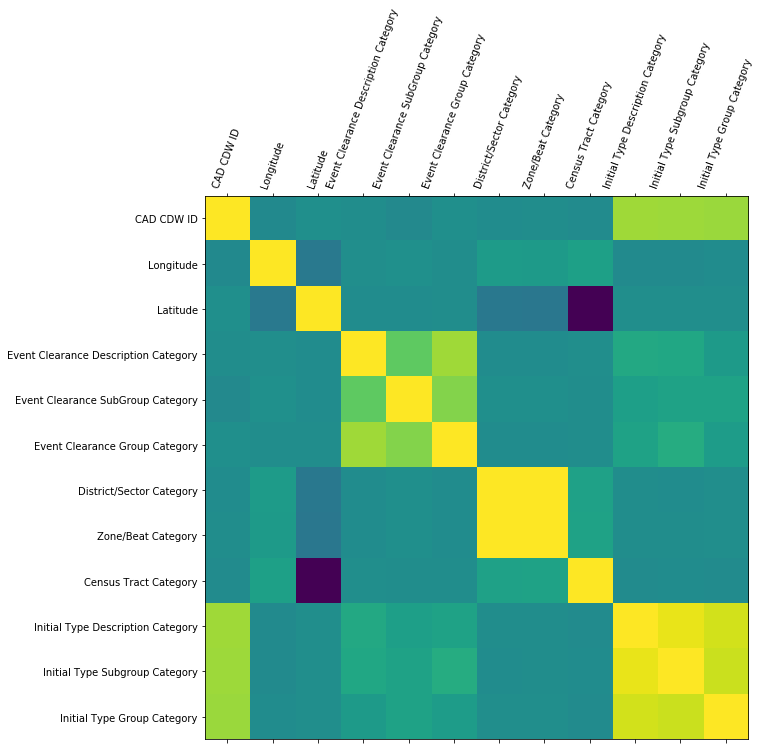

In [216]:
plot_corr(calls)

Unsurprisingly, `Initial Type` categories are correlated with one another, as are `Event Clearance` categories. `District/Sector` and `Zone/Beat` are both location-based and thus highly correlated as well. Similarly, `Census Tract Category` is highly (negatively) correlated with `Latitude`, suggesting that the census tracts may have been latitude-based.

Note: Since these are categorical, the number itself doesn't mean that much beyond being an encoding. Thus, this correlation matrix definitely does not tell the whole story. 

We can ignore any correlations with the ID.

### Pairplots

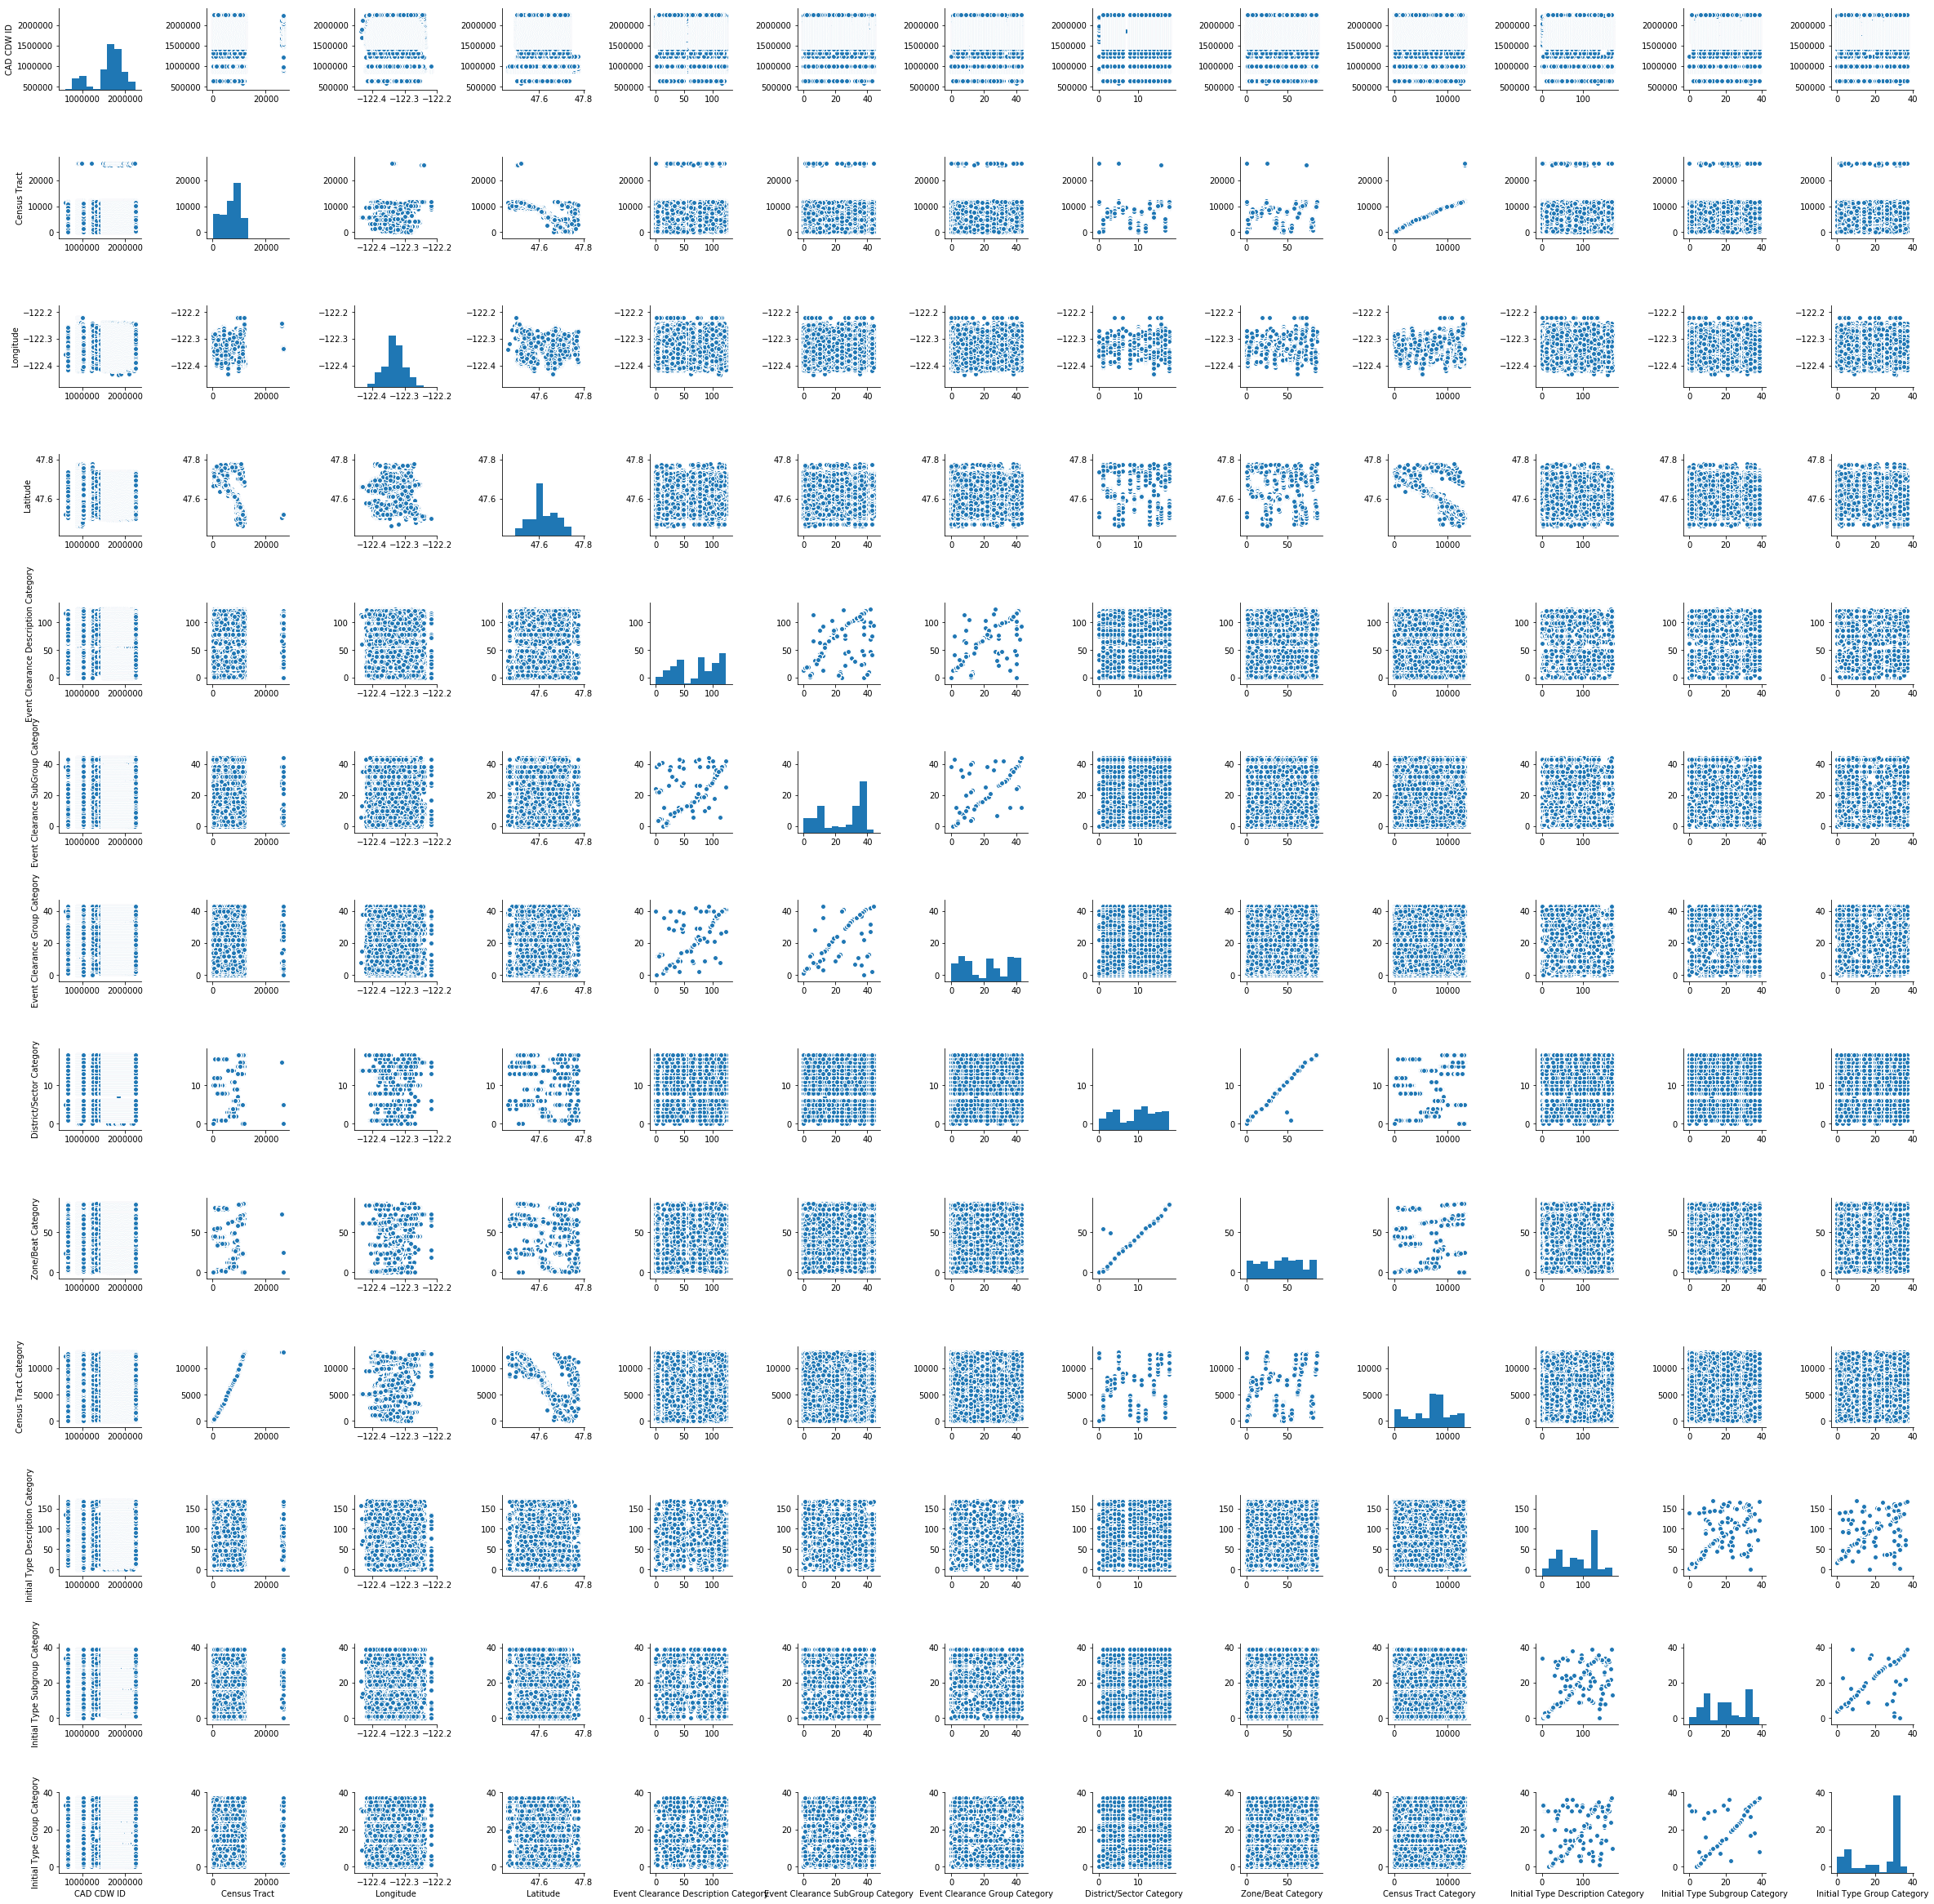

In [225]:
pp = sb.pairplot(calls.dropna())

## Histograms

Corrlation matrix and pairplots were not as helpful since a lot of the data we are looking at are categorical. Histograms help with seeing the frequency distributions within each category.

### Day of the Week

In [229]:
calls['day_of_week'] = calls['Event Clearance Date'].dt.dayofweek

### Hour of the Day

In [230]:
calls['hour_of_day'] = calls['Event Clearance Date'].dt.hour

In [237]:
list(categorical)

['Event Clearance Description',
 'Event Clearance SubGroup',
 'Event Clearance Group',
 'District/Sector',
 'Zone/Beat',
 'Census Tract',
 'Initial Type Description',
 'Initial Type Subgroup',
 'Initial Type Group']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d6740a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x178b0ef28>]], dtype=object)

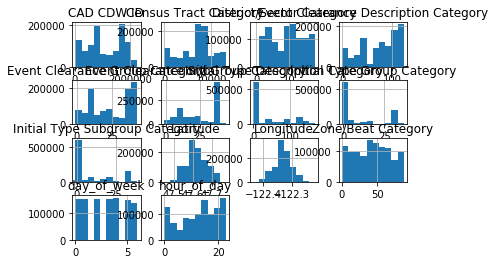

In [233]:
calls.hist()

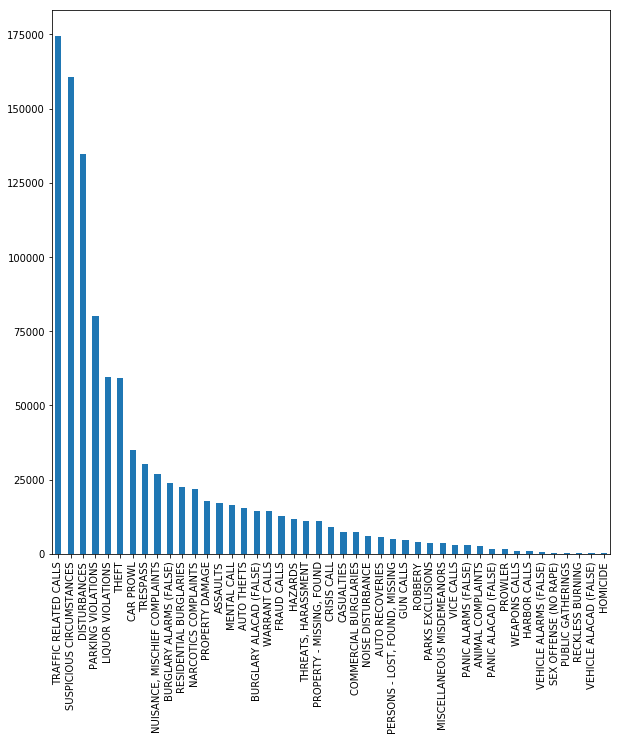

In [239]:
calls['Event Clearance SubGroup'].value_counts().plot(kind='bar', figsize=(10,10))

It appears that traffic related calls are the most frequent type of call, followed by "suspicious circumstances" and disturbances.

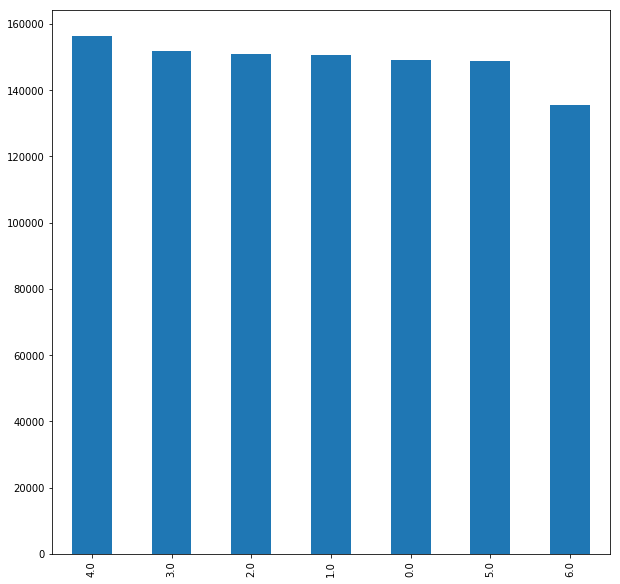

In [242]:
calls['day_of_week'].value_counts().plot(kind='bar', figsize=(10,10))

Monday=0 and Sunday=6.

Even though the days of the week are out of order (hehe woops), it doesn't appear that 911 calls are wildly more frequent on any given day. Friday has the most number of calls, and Sunday the least. Intuitively this doesn't seem too surprising.

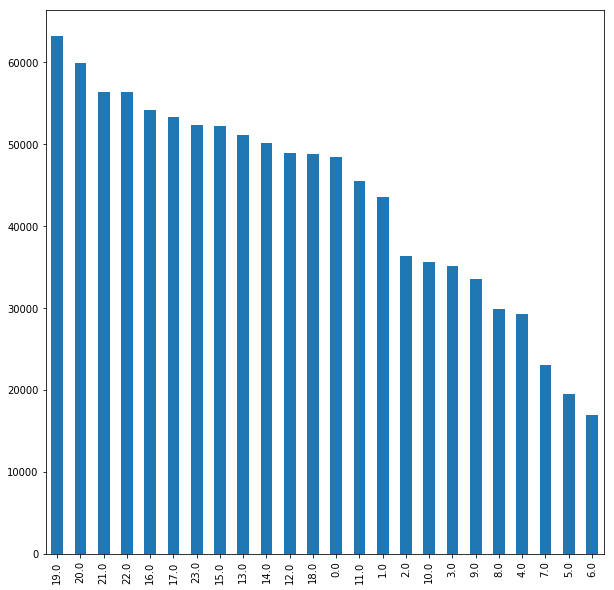

In [243]:
calls['hour_of_day'].value_counts().plot(kind='bar', figsize=(10,10))

0 is midnight (12am), and 23 is 11pm. Numbers are based on the 24-hour clock. It appears that evenings have the highest rates of 911 calls, with 7PM being the most frequent time, followed by 8pm, 9pm, 10pm. 6am has the fewest calls, and generally speaking, dawn and morning times have least frequent calls. This also intuitively makes sense. (Given more time, the X-axes on these two plots would be sorted in order.)

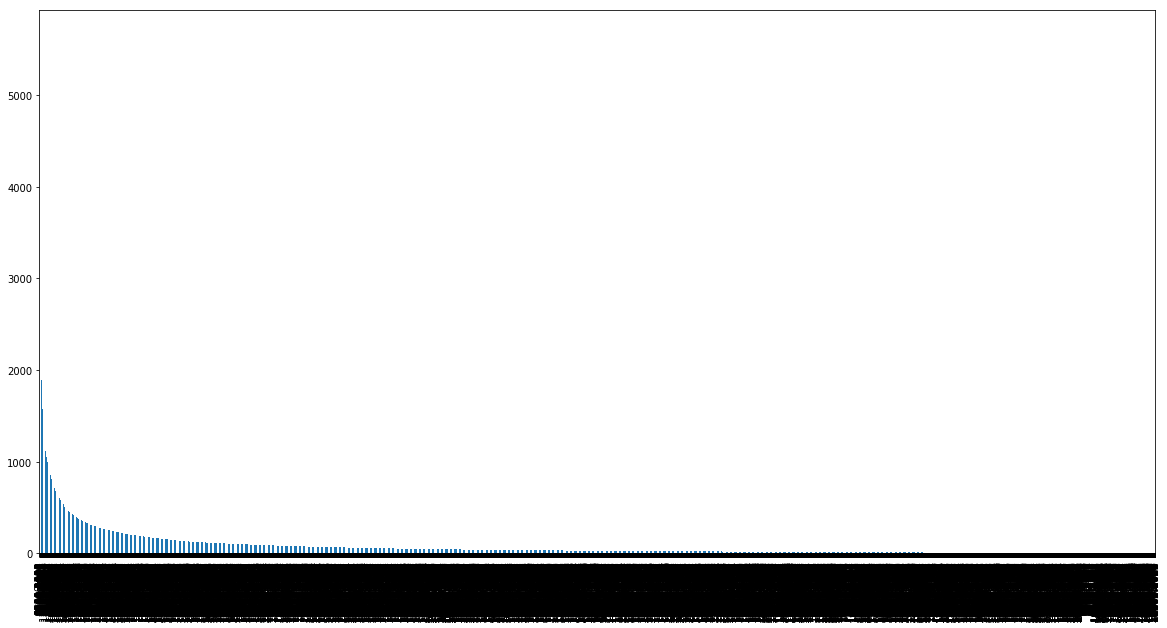

In [313]:
calls['Census Tract'].value_counts().plot(kind='bar', figsize=(20,10))

In [245]:
calls['Census Tract'].value_counts()

8100.2004     5646
9200.2028     4981
8100.2005     4009
8100.2010     3952
7500.4006     3815
9200.2021     3580
8001.2008     3504
7100.2001     3264
8400.1017     3213
8100.2043     3123
8100.2002     3107
8100.2009     3099
7300.3022     3069
8100.2035     3025
8200.1003     2805
8200.1004     2640
8002.1001     2391
8100.3003     2263
5301.2001     2258
8100.3011     2122
1200.4005     2049
8100.1027     2037
9100.1002     1995
8100.2001     1970
7500.4016     1923
9200.2002     1888
1200.4010     1872
8100.2013     1756
8400.1008     1733
8100.2007     1696
              ... 
4300.5008        1
7800.1034        1
1600.4001        1
11002.2033       1
4200.6002        1
5600.4021        1
11002.2037       1
10000.6006       1
10402.3014       1
7800.1052        1
2200.4014        1
10000.6025       1
10402.3001       1
7800.2017        1
1600.2014        1
6200.1040        1
4200.3026        1
5600.4024        1
6200.1038        1
300.1028         1
4200.3003        1
10402.1037  

It appears that many of the 911 calls are concentrated in specific locations in Seattle. What may be more helpful here is a map visualization.

In [328]:
# Top 40 census tracts with 911 calls
top_census = calls['Census Tract'].value_counts().iloc[:40]

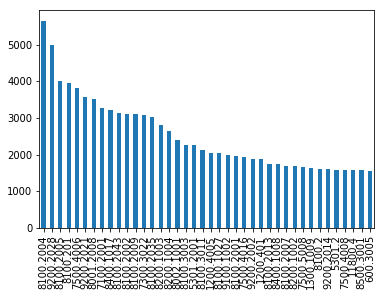

In [329]:
top_census.plot(kind='bar')

### Time Deltas between Initial and Clearance times

I am making an assumption that the time delta between `At Scene Time` and `Event Clearance Date` could suggest how long it took to resolve a given 911 call.

In [365]:
calls['time_delta'] = (calls['Event Clearance Date'] - calls['At Scene Time']).astype('timedelta64[s]')

In [367]:
time_deltas = list(calls['time_delta'].dropna())

In [379]:
np.mean(time_deltas) / 60.0 / 60.0 # Average number of hours to resolve a 911 call

2.0312107259532111

If the assumptions about the column datetimes are correct, an average 911 call where cops show up at the scene, would take about 2 hours to clearance.

## Convert Lat and Long to Zipcodes, Acquire More Data

At this point, it doesn't seem like the census tract is especially helpful. Instead, I can use the latitude and longitude to get the zipcode. Using the zipcode, I can also get the median wealth of the location, as I want to see if there are any patterns between call frequencies and socioeconomic status of the area.

We can use uszipcode, an external library, for this task.

In [249]:
from uszipcode import ZipcodeSearchEngine

In [250]:
search = ZipcodeSearchEngine()

In [280]:
# First, let's test out this library.
zipcode = search.by_coordinate(47.61097516,-122.3381467, radius=50, returns=1)

In [281]:
zipcode

[{"City": "Seattle", "Density": 19688.46153846154, "HouseOfUnits": 9226, "LandArea": 0.52, "Latitude": 47.60849210000001, "Longitude": -122.33640700000001, "NEBoundLatitude": 47.6185289, "NEBoundLongitude": -122.32199209999999, "Population": 10238, "SWBoundLatitude": 47.60317389999999, "SWBoungLongitude": -122.35125500000001, "State": "WA", "TotalWages": 321726983.0, "WaterArea": 0.1, "Wealthy": 31424.788337565933, "Zipcode": "98101", "ZipcodeType": "Standard"}]

In [282]:
zipcode[0]['Population']

10238

In [283]:
zipcode[0]['Wealthy']

31424.788337565933

In [284]:
zipcode[0]['TotalWages']

321726983.0

In [285]:
zipcode[0]['Zipcode']

'98101'

`Wealthy` and `TotalWages` may be helpful heuristics for socioeconomic status for the given area. `Population` may be helpful in calculating call density. That is, the number of calls per zip code divided by the population size.

In [273]:
def get_data(col):
    lat = col['Latitude']
    long = col['Longitude']
    zipcode = search.by_coordinate(lat, long, radius=50, returns=1)
    res = zipcode[0]
    
    return res['Population'], res['Wealthy'], res['TotalWages'], res['Zipcode']

In [ ]:
calls['Population'], calls['Wealthy'], calls['TotalWages'], calls['Zipcode'] = calls.apply(lambda x: get_data(x), axis=1)

In [ ]:
calls.head()

Ahh unfortunately this is taking a very long time. It would be very nice to have this but it will have to be added to the list of things that could be done given more time.

# Mapping Incidents

While D3.js is probably a much easier tool to work with, let's stick with Python. Basemap can be installed here: https://matplotlib.org/basemap/users/installing.html

To be quite frank, it is kind of a pain to install.

In [288]:
from mpl_toolkits.basemap import Basemap

In [311]:
lat = calls['Latitude'].tolist()
long = calls['Longitude'].tolist()

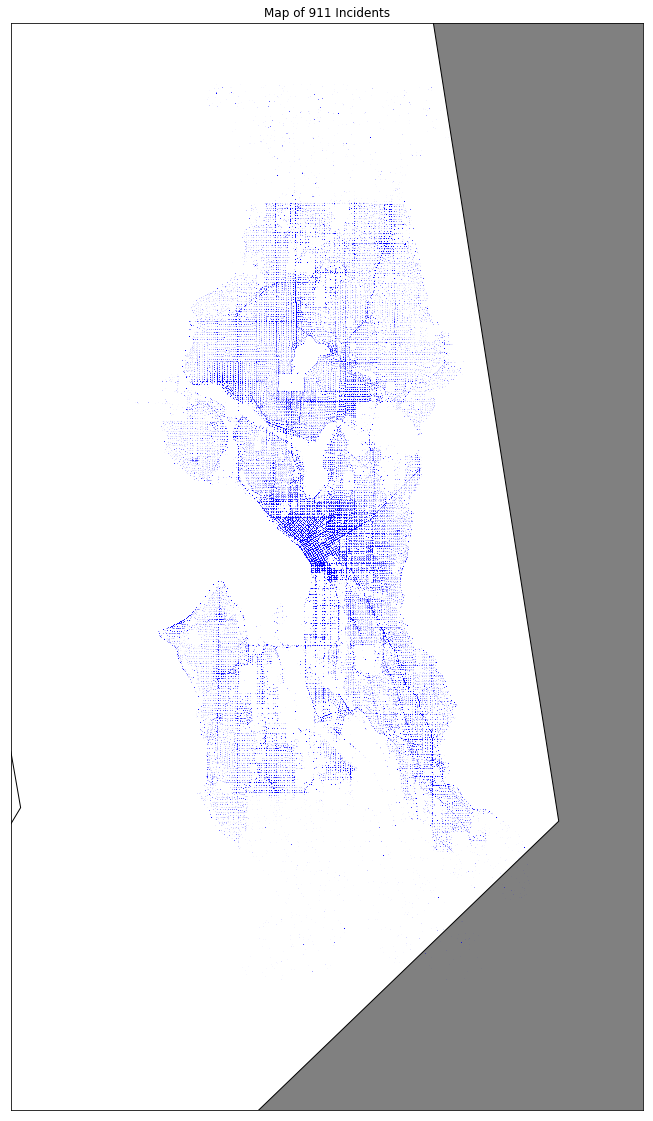

In [351]:
plt.figure(figsize=(20,20))

bm = Basemap(projection='merc',
            llcrnrlat=47.4,
            urcrnrlat=47.8,
            llcrnrlon=-122.5,
            urcrnrlon=-122.155,
            resolution='c') # Crude resolution, which is fine because we have so many data points.

bm.drawcoastlines()
bm.fillcontinents(color='grey', lake_color='blue')

x, y = bm(long, lat)

bm.plot(x, y, 'bo', markersize=0.01)

plt.title('Map of 911 Incidents')
plt.show()

It appears that a large concentration of 911 calls occur near downtown Seattle. We can also make out certain roads that are possibly busier by looking at where data points are concentrated on the map.

Given more time, we could color-code the dots based on the event subgroup.

With a higher fidelity map, such as one made in d3, we could better compare or overlay our map with, say, one of historical redlining within Seattle. This could give us insights into how the frequency of 911 calls may compare to the racial and ethnic segregation within the city, with population density accounted for.

# Machine Learning

As a machine learning task, let's train a model for predicting the Event SubGroup for a given 911 call. Furthermore, we're interested in the feature importances determined by each model, so that we may better understand what factors go into a given event subgroup prediction.

For the sake of time, I'll only be training using one method, the Random Forest ensemble method, as it tends to have fairly good accuracy, training times, and interpretability. We'll use the categorical encoding that we've already done from earlier. Note, however, that one-hot encoding might work better for model training. We could convert our current encoding to one-hot given more time.

In [380]:
from sklearn.ensemble import RandomForestClassifier

In [388]:
from sklearn.model_selection import train_test_split

### Prep data for training

#### Map `Event Clearance SubGroup` to `Event Clearance SubGroup Category`

In [ ]:
# 

For convenience, I'm going to drop the datetime columns. We have the `day_of_week` and `hour_of_day` columns, so we still kept some of the potentially helpful information.

In [396]:
calls.dtypes

CAD CDW ID                                       int64
Event Clearance Description                   category
Event Clearance SubGroup                      category
Event Clearance Group                         category
Event Clearance Date                    datetime64[ns]
District/Sector                               category
Zone/Beat                                     category
Census Tract                                  category
Longitude                                      float64
Latitude                                       float64
Initial Type Description                      category
Initial Type Subgroup                         category
Initial Type Group                            category
At Scene Time                           datetime64[ns]
Event Clearance Description Category              int8
Event Clearance SubGroup Category                 int8
Event Clearance Group Category                    int8
District/Sector Category                          int8
Zone/Beat 

#### Drop unused rows and columns

In [464]:
rf_categorical = list(categorical)
rf_categorical.remove('Event Clearance SubGroup')

In [465]:
# Drop datetime and categorical columns. We've encoded what we need already anyway.
rf_drop = ['Event Clearance Date', 'At Scene Time'] + rf_categorical

In [480]:
rf_data = calls.drop(rf_drop, axis=1, inplace=False)

Note: Remember from earlier that many rows were missing `Initial Type ...` data. Let's just drop them since we have so much data leftover anyway. 

In [481]:
rf_data = rf_data.dropna(axis=0, inplace=False)

#### Split our data into inputs and target, training and test sets

In [482]:
y = rf_data['Event Clearance SubGroup']

In [483]:
X = rf_data.drop('Event Clearance SubGroup', axis=1, inplace=False)

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Train Classifier

In [485]:
clf = RandomForestClassifier(random_state=0)

Note: Given more time, we would run GridSearchCV for cross-validated parameter tuning.

In [486]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [487]:
print(clf.feature_importances_)

[ 0.00770013  0.00259414  0.00367553  0.21145285  0.25456684  0.21722637
  0.0014545   0.00215994  0.00340216  0.10248341  0.07269832  0.10743983
  0.00120108  0.00274035  0.00920456]


In [488]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [489]:
clf.predict(y_test)

ValueError: could not convert string to float: 'SUSPICIOUS CIRCUMSTANCES'

### Evaluate

In [453]:
from sklearn.model_selection import cross_val_score

By default, cross_val_score will score 3 folds of the test data.

In [454]:
print(cross_val_score(clf, X_test, y_test))

[ 0.99736704  0.99708183  0.99671506]


Pretty good! But we all know that raw accuracy can be misleading, especially when there are class skews. For example, we know that traffic-related calls are way more frequent than, say, homicide. Let's take a closer look at balanced accuracy and area-under-the-curve for the ROC curve.

In [455]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_pred)

# Conclusion